<a href="https://colab.research.google.com/github/NdanyuzweP/Sentiment-Analysis-Assignment/blob/main/Sentiment_Analysis_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries**

Loading necessary Python libraries for sentiment analysis, including Pandas, NLTK, Matplotlib, and Scikit-learn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd

### **Loading the Dataset**

Importing the IMDB dataset for sentiment analysis and displaying the first few rows.

In [22]:
# Load the dataset
df = pd.read_csv('/content/IMDB Dataset.csv')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


### **Exploring the Data**

Checking dataset structure, missing values, and basic statistics.

In [3]:
# Basic info
print(df.info())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
review       0
sentiment    0
dtype: int64


### **Sentiment Distribution**

Analyzing and visualizing the distribution of positive and negative sentiments.


sentiment
positive    25000
negative    25000
Name: count, dtype: int64


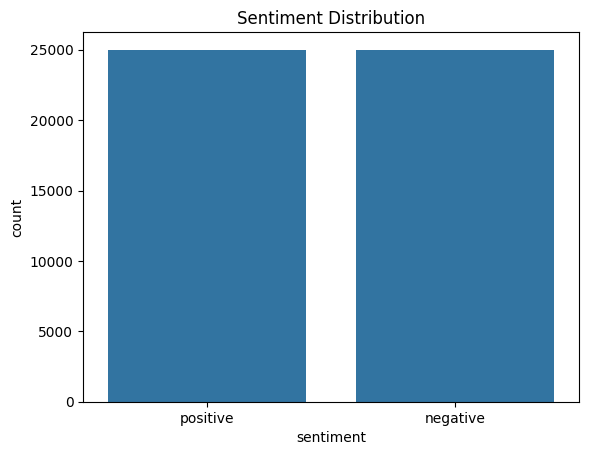

In [4]:
# Class distribution
print(df['sentiment'].value_counts())

# Visualize
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

### **Review Length Analysis**

Examining the length of reviews and their correlation with sentiment.

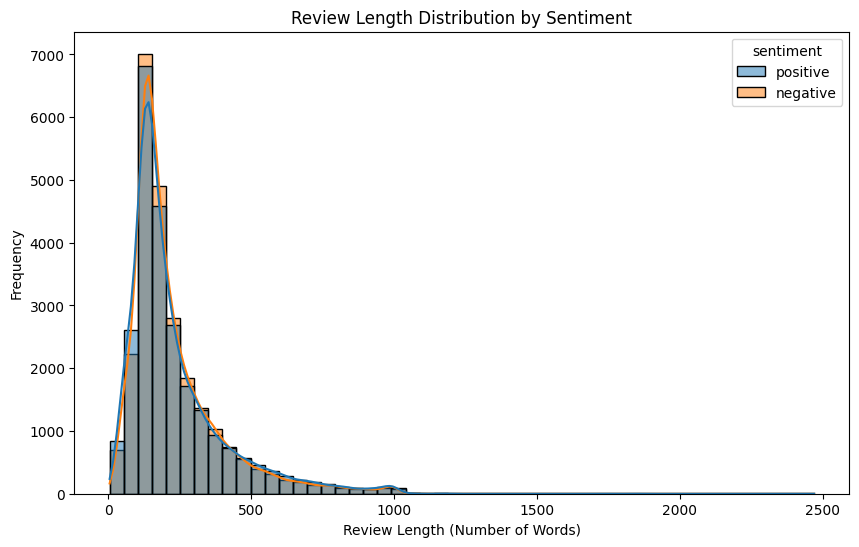

In [5]:
# Add a column for review length
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Plot review length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=50, kde=True)
plt.title('Review Length Distribution by Sentiment')
plt.xlabel('Review Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

### **Word Cloud Visualization**

Generating word clouds for positive and negative reviews to identify common words.

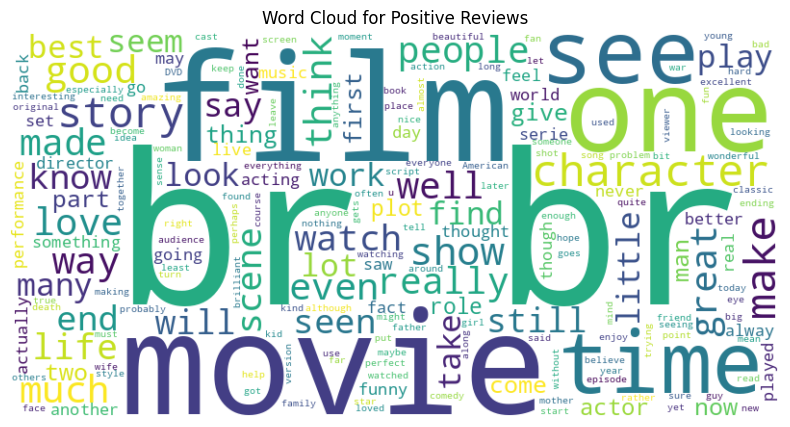

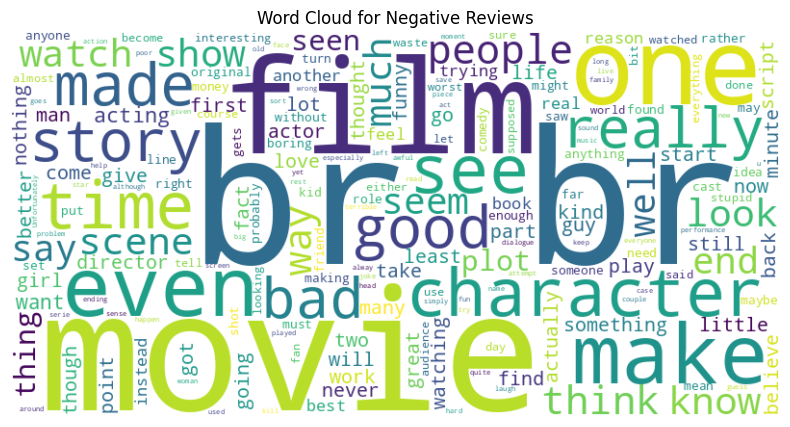

In [6]:
# Function to generate word clouds
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Positive reviews
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['review'])
generate_wordcloud(positive_reviews, 'Word Cloud for Positive Reviews')

# Negative reviews
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['review'])
generate_wordcloud(negative_reviews, 'Word Cloud for Negative Reviews')

### **Top Bigrams in Reviews**

Extracting and analyzing frequently occurring bigrams in positive and negative reviews.

In [7]:
# Function to get top n-grams
def get_top_ngrams(text, n=2, top_k=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_k]

# Top bigrams in positive reviews
positive_bigrams = get_top_ngrams(df[df['sentiment'] == 'positive']['review'], n=2)
print("Top Bigrams in Positive Reviews:", positive_bigrams)

# Top bigrams in negative reviews
negative_bigrams = get_top_ngrams(df[df['sentiment'] == 'negative']['review'], n=2)
print("Top Bigrams in Negative Reviews:", negative_bigrams)

Top Bigrams in Positive Reviews: [('br br', 49041), ('of the', 41605), ('in the', 25745), ('the film', 14656), ('and the', 14430), ('this movie', 13523), ('to the', 12811), ('it is', 11549), ('this film', 10904), ('the movie', 10411)]
Top Bigrams in Negative Reviews: [('br br', 52047), ('of the', 35654), ('in the', 24507), ('this movie', 18008), ('the movie', 13484), ('to be', 13361), ('and the', 12282), ('the film', 12198), ('this film', 10911), ('to the', 10898)]


### **Text Preprocessing and Cleaning**

In [8]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Download the missing resource
nltk.download('punkt_tab')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join tokens back into a string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply cleaning to the dataset
df['cleaned_review'] = df['review'].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


### **Encoding Sentiment Labels**

In [9]:
# Encode sentiment labels
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

### **Splitting the Dataset**

In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset
X = df['cleaned_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Feature Extraction with TF-IDF**

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf.transform(X_test)

In [12]:
import pickle

# Save TF-IDF data
with open('X_train_tfidf.pkl', 'wb') as f:
    pickle.dump(X_train_tfidf, f)
with open('X_test_tfidf.pkl', 'wb') as f:
    pickle.dump(X_test_tfidf, f)
# Save labels
with open('y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)
with open('y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)

In [13]:
# For traditional models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# For deep learning models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

# For evaluation
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load preprocessed TF-IDF data
with open('X_train_tfidf.pkl', 'rb') as f:
    X_train_tfidf = pickle.load(f)
with open('X_test_tfidf.pkl', 'rb') as f:
    X_test_tfidf = pickle.load(f)

# Load labels
with open('y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

# Initialize and train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred_log_reg = log_reg.predict(X_test_tfidf)

Logistic Regression Metrics:
Accuracy: 0.8855
Precision: 0.8767
Recall: 0.8992
F1-Score: 0.8878


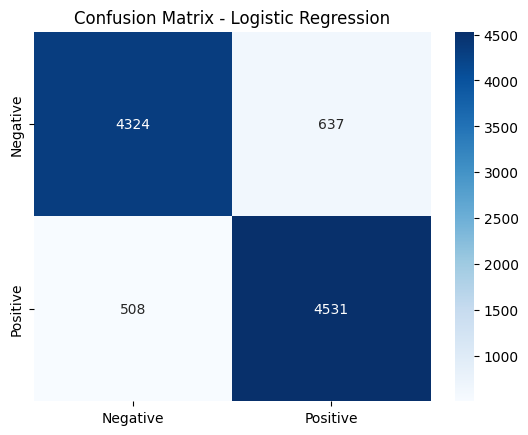

In [16]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_log_reg)
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)

print(f"Logistic Regression Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [28]:
# Save Logistic Regression model
import joblib
joblib.dump(log_reg, 'logistic_regression_model.pkl')

# Save LSTM model
model.save('lstm_model.h5')

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 500, 1000]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_tfidf, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}
Best Accuracy: 0.8823749223549098


## **Deep Learning Model**



In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to a fixed length
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

In [20]:
# Define the LSTM model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=5,
    batch_size=64,
    callbacks=[early_stopping]
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 94ms/step - accuracy: 0.5973 - loss: 0.6514 - val_accuracy: 0.7253 - val_loss: 0.5654
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 87ms/step - accuracy: 0.6825 - loss: 0.6148 - val_accuracy: 0.8229 - val_loss: 0.5112
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.8146 - loss: 0.4624 - val_accuracy: 0.8566 - val_loss: 0.3362
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8970 - loss: 0.2924 - val_accuracy: 0.8579 - val_loss: 0.3316
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.9136 - loss: 0.2407 - val_accuracy: 0.8509 - val_loss: 0.3494


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
LSTM Metrics:
Accuracy: 0.8579
Precision: 0.8693
Recall: 0.8450
F1-Score: 0.8570


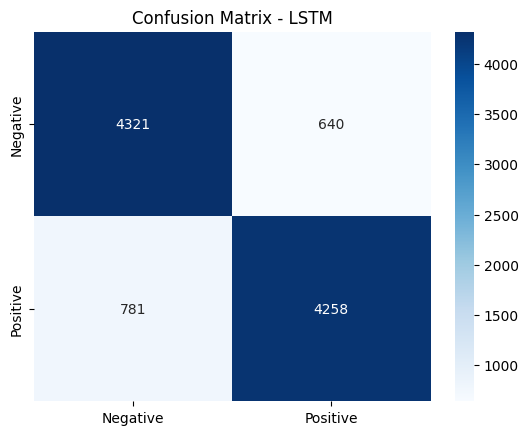

In [23]:
# Predict on test data
y_pred_lstm = (model.predict(X_test_pad) > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_lstm)
precision = precision_score(y_test, y_pred_lstm)
recall = recall_score(y_test, y_pred_lstm)
f1 = f1_score(y_test, y_pred_lstm)

print(f"LSTM Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lstm)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - LSTM')
plt.show()

In [26]:
# Save Logistic Regression model
import joblib
joblib.dump(log_reg, 'deep learning model.pkl')

# Save LSTM model
model.save('lstm_model.h5')